# k-최근접 이웃 회귀 알고리즘
- 단점 : 데이터가 커지면 비용과 시간이 많이듬, 데이터 범위 밖은 예측 불가능
- k = 3 이면 데이터에 가까운 순서대로 3개를 가져와서 데이터의 값을 판단
- 분류 알고리즘에서는 데이터가 어느쪽인지를 판단하였음

## k-최근접 이웃 회귀(knn regression)
- 회귀(regression) : 특정한 입력변수값을 사용하여 출력변수의 값을 계산하는 것을 예측(prediction)문제라고 한다.
  예측문제 중에서 출력변수의 값이 연속값인 문제를 회귀(regression) 또는 회귀분석(regression analysis)라고 부른다.
- KNN Regression(k-최근접 이웃 회귀)알고리즘 : 주변의 가장 가까운 K개의 샘플을 통해 값을 예측하는 방식으로
  가장 간단한 방식으로는 K개 샘플의 평균을 이용할 수 있다.

### 분류 및 예측을 위한 모델
1. Model_based Learning(모델 기반 학습)
  - 데이터로부터 모델을 생성하여 분류/예측을 진행
  - 선형/비선형 모델(linear regression, logistic regression)
  - Neural Network
  - 의사결정나무(decision tree)
  - SVM(Support Vector Machine)
2. Instance_based Learning(사례 기반 학습)
  - 별도의 모델 생성없이 데이터베이스에 있는 자료들을 분류/예측에 사용
  - 각각의 관측치만을 이용하여 새로운 데이터에 대한 예측을 진행
  - 대표적인 알고리즘 : knn

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import warnings
import sys
import scipy as sp
import IPython
import sklearn

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

mpl.rcParams['font.family'] = 'D2coding'  # 한글 깨짐 해결

### 생선 무게 예측

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4,
                         18.0, 18.7, 19.0, 19.6, 20.0,
                         21.0, 21.0, 21.0, 21.3, 22.0,
                         22.0, 22.0, 22.0, 22.0, 22.5,
                         22.5, 22.7, 23.0, 23.5, 24.0,
                         24.0, 24.6, 25.0, 25.6, 26.5,
                         27.3, 27.5, 27.5, 27.5, 28.0,
                         28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0, 39.0,
                         39.0, 39.0, 40.0, 40.0, 40.0,
                         40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0,
                         78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0,
                         130.0, 135.0, 110.0, 130.0, 150.0,
                         145.0, 150.0, 170.0, 225.0, 145.0,
                         188.0, 180.0, 197.0, 218.0, 300.0,
                         260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0, 685.0,
                         700.0, 700.0, 690.0, 900.0, 650.0,
                         820.0, 850.0, 900.0, 1015.0, 820.0,
                         1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

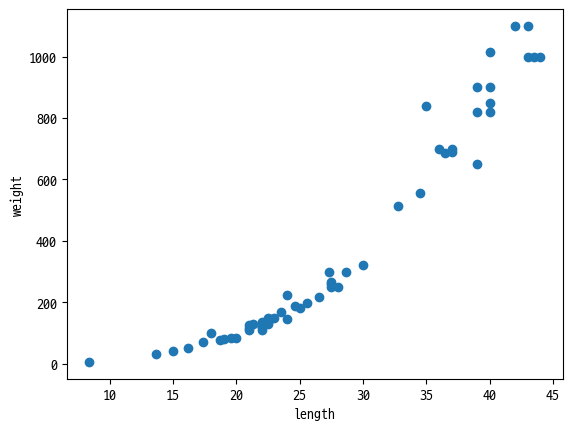

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 데이터 분리 

In [4]:
# train_test_split import
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [5]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [6]:
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

### ML Package Version List

In [20]:
print('Python version :', sys.version)
print('Pandas version :', pd.__version__)
print('matplotlib version :', mpl.__version__)
print('scipy version :', sp.__version__)
print('IPython version :', IPython.__version__)
print('scikit version :', sklearn.__version__)

Python version : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Pandas version : 1.4.4
matplotlib version : 3.5.2
scipy version : 1.9.1
IPython version : 7.31.1
scikit version : 1.0.2


In [23]:
# 정답을 맞춘 갯수의 비율
knr.score(test_input, test_target)

0.992809406101064

In [26]:
# 결정계수(R2) = 1 - (타겟 - 예측)^2 의 합 / (타깃 - 평균)^2 의 합
# mean_absolute_error import
# MAE : 타깃과 예측의 절대값 오차를 평균하여 반환
# 테스트 데이터의 예측
test_predict = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_predict)
mae

19.157142857142862

In [27]:
# 훈련데이터 정확도 측정
knr.score(train_input, train_target)

0.9698823289099254

### 과대적합 & 과소적합
- 과대적합(Overfitting) : 훈련 세트에서 점수가 좋았는데 테스트 세트에서는 점수가 굉장히 나쁠때
- 과소적합(Underfitting) : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 너무 낮은 경우
- 일반적으로 과대적합과 과소적합이 발생하는 이유중 하나는 데이터의 크기가 매우 작기 때문이다.

In [30]:
# 테스트의 결정계수가 훈련의 결정계수보다 점수가 높아서 과소적합을 의심할 수 있다.
# 과소적합을 해결하는 일반적인 방법은 모델을 복잡하게 만드는 것이다.
# k-최근접 이웃의 모델을 복잡하게 만드는 방법은 k의 값을 낮추는 것이다.
knr.n_neighbors = 3
# 모델 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609
